### 1. **Import Necessary Libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


- **`pandas`** is used for data manipulation and analysis.
- **`LabelEncoder`** from `sklearn.preprocessing` is used for encoding categorical variables into numerical values.
- **`GaussianNB`** from `sklearn.naive_bayes` is a Naive Bayes classifier for classification tasks assuming a Gaussian distribution of features.
- **`SimpleImputer`** handles missing values by filling them with a specified strategy (e.g., median).
- **`accuracy_score`, `classification_report`, `confusion_matrix`** are metrics for evaluating the model's performance.
- **`matplotlib.pyplot` and `seaborn`** are used for data visualization.


### 2. **Load the Training and Test Datasets**

In [2]:
# Load the training and test datasets
train_file_path = '../train.csv'  # Update with your train dataset file path
test_file_path = '../test.csv'  # Update with your test dataset file path
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)


- The code reads the training and test datasets using `pd.read_csv()`, which loads CSV files into `DataFrame` objects for easy data manipulation.


### 3. **Handle Missing Values**

In [3]:
# Fill NaN values for 'Age' and 'Embarked' in both datasets
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)


- The `fillna()` method replaces missing values (`NaN`) in specific columns.
  - **`Age`** is filled with the median age to avoid skewing the data.
  - **`Embarked`** is filled with the most common value (mode) to handle missing ports of embarkation.
  - **`Fare`** in the test data is filled with its median to ensure no missing values.


In [4]:
# Impute missing values for 'Fare' in the test dataset (if any)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

### 4. **Combine Train and Test Data for Consistent Encoding**

In [5]:
# Combine train and test data to fit LabelEncoder on all possible categories
combined_data = pd.concat([train_data, test_data], axis=0, copy=True)

In [6]:
# Fit LabelEncoder on combined data for 'Sex' and 'Embarked'
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()
combined_data['Sex'] = label_encoder_sex.fit_transform(combined_data['Sex'])
combined_data['Embarked'] = label_encoder_embarked.fit_transform(combined_data['Embarked'])


- **Combining Data**: Combines training and test datasets to apply `LabelEncoder` on both sets, ensuring consistency in encoding.
- **Label Encoding**:
  - **`label_encoder_sex`** converts categorical values like "male" and "female" to numerical (e.g., 0 and 1).
  - **`label_encoder_embarked`** converts "C", "Q", "S" to numerical values.

### 5. **Split Combined Data Back into Train and Test Sets**

In [7]:
# Split the data back into train and test sets
train_data = combined_data.iloc[:len(train_data)].copy()
test_data = combined_data.iloc[len(train_data):].copy()

- **Splitting**: The `iloc` method splits `combined_data` back into `train_data` and `test_data` based on their original lengths.


### 6. **Drop Non-Numeric or Non-Useful Columns**

In [8]:
# Drop non-numeric or non-useful columns
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

- Columns like **`PassengerId`**, **`Name`**, **`Ticket`**, and **`Cabin`** are dropped because:
  - They are either unique identifiers or textual data that do not contribute meaningfully to the model.


### 7. **Handle Missing Values with Imputer**

In [9]:
# Ensure there are no NaN values in training and test data
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(train_data.drop('Survived', axis=1))
y_train = train_data['Survived'].copy()

In [10]:
# Drop 'Survived' and 'PassengerId' from the test set before transforming
X_test = imputer.transform(test_data.drop(['PassengerId', 'Survived'], axis=1, errors='ignore'))

- **`SimpleImputer`** fills any remaining missing values with the median.
- **`X_train`**: Training features after dropping the target variable `Survived`.
- **`y_train`**: Target variable (`Survived`) for training.
- **`X_test`**: Test features prepared similarly, ensuring consistency with training.


### 8. **Model Initialization and Training**

In [11]:
# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

- A **`GaussianNB`** model is initialized and trained using `fit()`.
- This algorithm assumes that the features follow a normal distribution and applies Bayes' theorem to calculate the probability of each class.


### 9. **Make Predictions on Test Data**

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

- The **`predict()`** method uses the trained model to make predictions on `X_test`.

### 10. **Load Submission Data for Evaluation (if available)**

In [13]:
# Load the gender_submission.csv file for evaluation (if available)
submission_file_path = '../gender_submission.csv'  # Update with your actual submission file path
submission_data = pd.read_csv(submission_file_path)

- **`submission_data`** contains actual survival labels, used here for comparison.


### 11. **Merge Predictions with Actual Results**

In [14]:
# Merge predictions with actual results based on 'PassengerId'
predictions_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Predicted_Survived': y_pred})

In [15]:
# Evaluate the model (assuming you have actual results in submission_data)
if 'Survived' in submission_data.columns:
    predictions_df = predictions_df.merge(submission_data[['PassengerId', 'Survived']], on='PassengerId')
    print("Accuracy Score:", accuracy_score(predictions_df['Survived'], predictions_df['Predicted_Survived']))
    print("\nClassification Report:\n", classification_report(predictions_df['Survived'], predictions_df['Predicted_Survived']))
    print("\nConfusion Matrix:\n", confusion_matrix(predictions_df['Survived'], predictions_df['Predicted_Survived']))

Accuracy Score: 0.8971291866028708

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.91       266
           1       0.80      0.95      0.87       152

    accuracy                           0.90       418
   macro avg       0.89      0.91      0.89       418
weighted avg       0.91      0.90      0.90       418


Confusion Matrix:
 [[231  35]
 [  8 144]]


- **Merge**: Combines predicted and actual `Survived` columns by `PassengerId` for evaluation.
- **Metrics**:
  - **`accuracy_score`**: Measures the overall accuracy of the model.
  - **`classification_report`**: Provides precision, recall, F1-score, and support for each class.
  - **`confusion_matrix`**: A matrix showing true positive, false positive, true negative, and false negative counts.

### 12. **Visualize the Confusion Matrix**

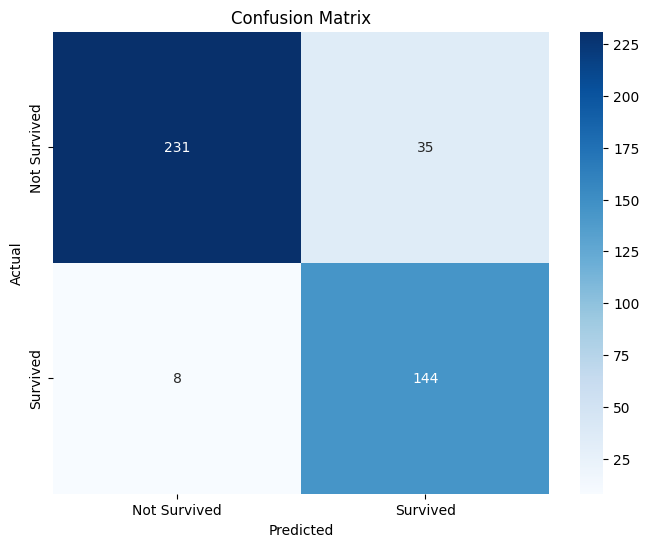

In [16]:
    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(predictions_df['Survived'], predictions_df['Predicted_Survived']),
                annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


- **`plt.figure()`** and **`sns.heatmap()`** create a visual representation of the confusion matrix to better understand the model's performance.

### Explanation of Naive Bayes Algorithm:
- **Naive Bayes** is based on Bayes' theorem, which calculates the posterior probability \( P(A|B) \) using:
\[
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
\]
- **Assumptions**:
  - Features are independent (hence "naive").
  - Assumes a Gaussian (normal) distribution for continuous features.

This code applies **Gaussian Naive Bayes**, which works well when features are normally distributed and effectively handles categorical and numerical data after preprocessing.